# Explore MNIST AE to generate new images with PCA
----

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mnist_ae import *

import torch
from torch.utils.data import DataLoader
dev = 'cuda' if torch.cuda.is_available() else 'cpu'

from sklearn.decomposition import PCA
import numpy as np

In [2]:
MAE = MNIST_AE(r"/mnt/data/data/", r"/mnt/data/train_camp/mnist_ae", device=dev)
MAE.load_last_model()

{'epoch': 9, 'num_epoch': 10}

In [3]:
# get the test data set
mnist_data = tv.datasets.MNIST(
    root=r"/mnt/data/data/",
    train=False,
    download=True,
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
        tv.transforms.Normalize([0.5], [0.5])
    ])
)
print(f"There are {len(mnist_data)} test samples")

There are 10000 test samples


In [4]:
# data loader
BATCH_SIZE = 100
test_gen = DataLoader(mnist_data, batch_size=BATCH_SIZE)

## Generate the latent space

In [5]:
test_latent = None
for dt in test_gen:
    y = MAE.eval_encoder(dt[0]).detach().cpu().numpy()
    test_latent = y if test_latent is None else np.vstack([test_latent, y])
    
print(f"test_latent: {test_latent.shape}")

test_latent: (10000, 16)


Since there are 16 variables to generate, we can use PCA from the latent space to create the variations.

In [6]:
pcx = PCA(n_components=4).fit(test_latent)
print(f"Explained variance ratio: {pcx.explained_variance_ratio_}, total: {pcx.explained_variance_ratio_.sum()*100:.2f}%")

Explained variance ratio: [0.6044846  0.13615726 0.09375376 0.05743357], total: 89.18%


### The mean image

In [7]:
pcx.mean_

array([11.984698  ,  9.567233  ,  2.7834368 ,  3.496439  ,  6.6110115 ,
        1.8383651 ,  0.        ,  0.        ,  9.687493  ,  5.514361  ,
        4.904297  ,  0.22451204,  4.2011385 ,  4.397222  ,  0.        ,
        0.        ], dtype=float32)

Text(0.5, 1.0, 'Mean Image')

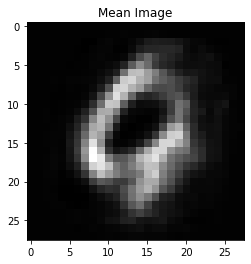

In [8]:
z = MAE.eval_decoder(torch.tensor(pcx.mean_).unsqueeze(0))
plt.imshow(z.view((28, 28)).detach().cpu().numpy(), cmap=plt.cm.gray)
plt.title('Mean Image')

### Make a grid

In [9]:
s = np.linspace(-20.0, 20.0, 11, dtype=np.float32)
n = len(s)*len(s)

xs, ys = np.meshgrid(s,s)
print(f"xs: {xs.shape}, ys: {ys.shape}")

xs: (11, 11), ys: (11, 11)


## PC1 vs PC2

In [10]:
v = np.hstack((xs.reshape(-1, 1), ys.reshape(-1, 1), np.zeros((n, 2), dtype=np.float32)))
print(f"v: {v.shape}, type:{v.dtype}")

v: (121, 4), type:float32


In [11]:
X = np.matmul(np.ones((v.shape[0],1), dtype=np.float32), np.expand_dims(pcx.mean_,axis=0)) + np.matmul(v, pcx.components_)
print(f"X: {X.shape}, type:{X.dtype}")

X: (121, 16), type:float32


In [12]:
Z = MAE.eval_decoder(torch.tensor(X))
Z.shape

torch.Size([121, 784])

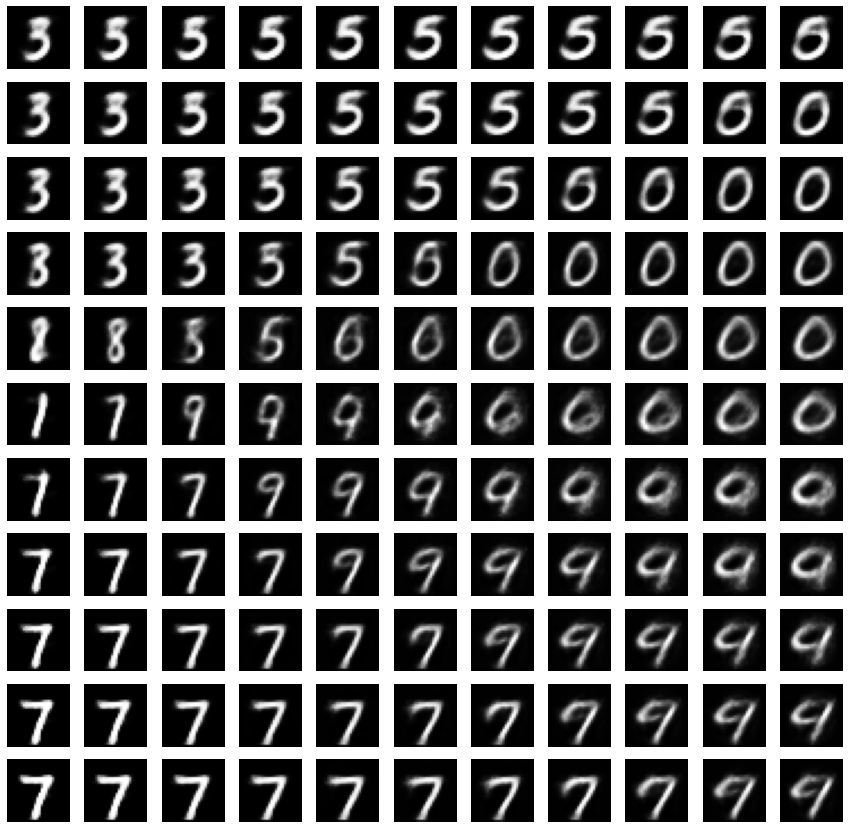

In [13]:
fig = plt.figure(figsize=(15, 15))
for i in range(Z.shape[0]):
    ax = fig.add_subplot(11, 11, i+1)
    ax.imshow(Z[i,:].view((28, 28)).detach().cpu().numpy(), cmap=plt.cm.gray)
    ax.set_axis_off()

## PC1 vs PC3

In [14]:
v = np.hstack((xs.reshape(-1, 1), np.zeros((n, 1), dtype=np.float32), ys.reshape(-1, 1), np.zeros((n, 1), dtype=np.float32)))
print(f"v: {v.shape}, type:{v.dtype}")

v: (121, 4), type:float32


In [15]:
X = np.matmul(np.ones((v.shape[0],1), dtype=np.float32), np.expand_dims(pcx.mean_,axis=0)) + np.matmul(v, pcx.components_)
print(f"X: {X.shape}, type:{X.dtype}")

X: (121, 16), type:float32


In [16]:
Z = MAE.eval_decoder(torch.tensor(X))
Z.shape

torch.Size([121, 784])

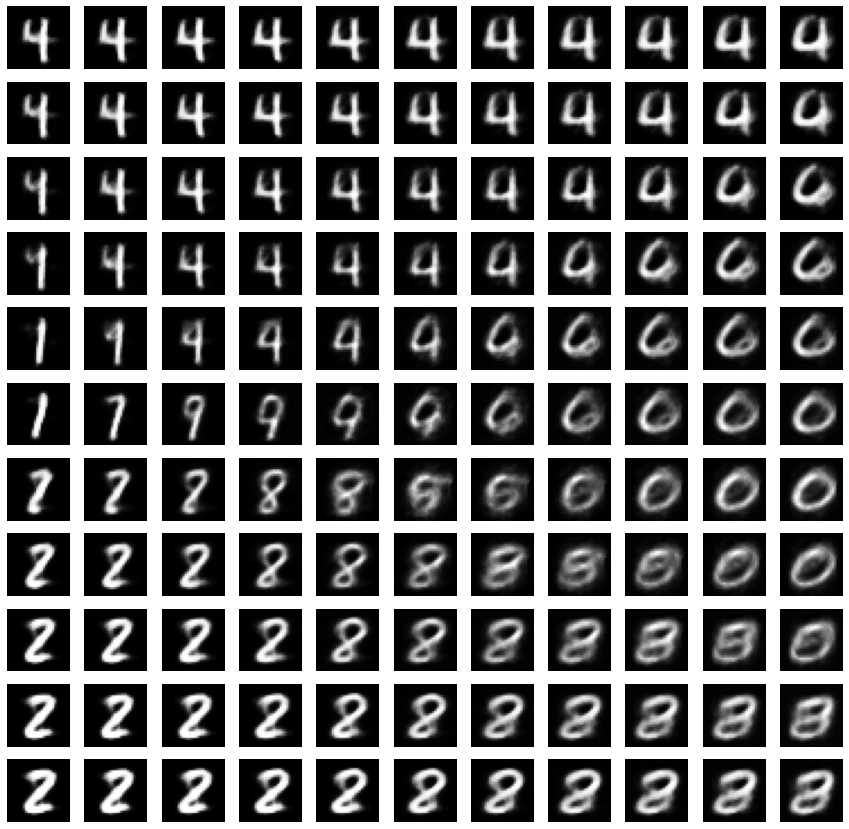

In [17]:
fig = plt.figure(figsize=(15, 15))
for i in range(Z.shape[0]):
    ax = fig.add_subplot(11, 11, i+1)
    ax.imshow(Z[i,:].view((28, 28)).detach().cpu().numpy(), cmap=plt.cm.gray)
    ax.set_axis_off()

## PC1 vs PC4

In [18]:
v = np.hstack((xs.reshape(-1, 1), np.zeros((n, 2), dtype=np.float32), ys.reshape(-1, 1)))
print(f"v: {v.shape}, type:{v.dtype}")

v: (121, 4), type:float32


In [19]:
X = np.matmul(np.ones((v.shape[0],1), dtype=np.float32), np.expand_dims(pcx.mean_,axis=0)) + np.matmul(v, pcx.components_)
print(f"X: {X.shape}, type:{X.dtype}")

X: (121, 16), type:float32


In [20]:
Z = MAE.eval_decoder(torch.tensor(X))
Z.shape

torch.Size([121, 784])

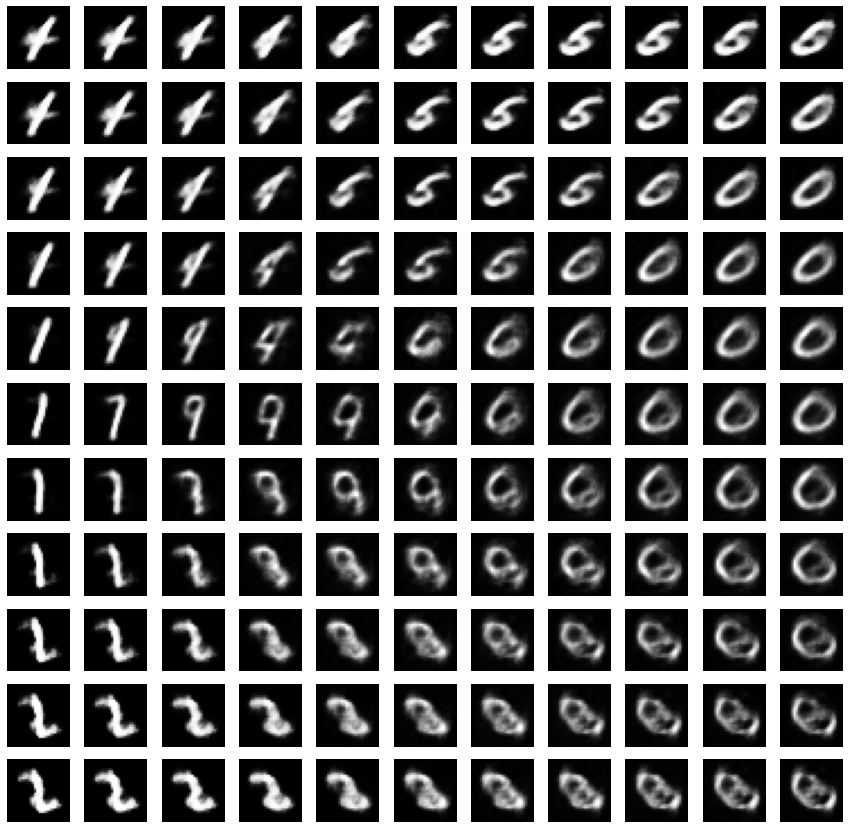

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(Z.shape[0]):
    ax = fig.add_subplot(11, 11, i+1)
    ax.imshow(Z[i,:].view((28, 28)).detach().cpu().numpy(), cmap=plt.cm.gray)
    ax.set_axis_off()

## PC2 vs PC3

In [22]:
v = np.hstack((np.zeros((n, 2), dtype=np.float32), xs.reshape(-1, 1), ys.reshape(-1, 1)))
print(f"v: {v.shape}, type:{v.dtype}")

v: (121, 4), type:float32


In [23]:
X = np.matmul(np.ones((v.shape[0],1), dtype=np.float32), np.expand_dims(pcx.mean_,axis=0)) + np.matmul(v, pcx.components_)
print(f"X: {X.shape}, type:{X.dtype}")

X: (121, 16), type:float32


In [24]:
Z = MAE.eval_decoder(torch.tensor(X))
Z.shape

torch.Size([121, 784])

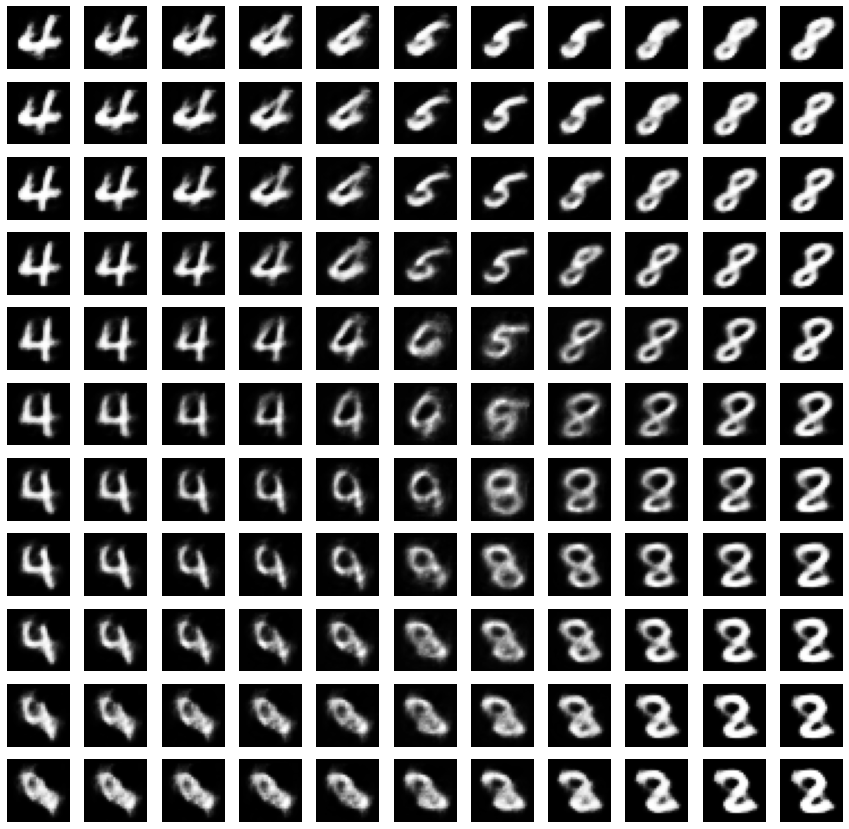

In [25]:
fig = plt.figure(figsize=(15, 15))
for i in range(Z.shape[0]):
    ax = fig.add_subplot(11, 11, i+1)
    ax.imshow(Z[i,:].view((28, 28)).detach().cpu().numpy(), cmap=plt.cm.gray)
    ax.set_axis_off()

## PC2 vs PC4

In [26]:
v = np.hstack((np.zeros((n, 1), dtype=np.float32), xs.reshape(-1, 1), np.zeros((n, 1), dtype=np.float32), ys.reshape(-1, 1)))
print(f"v: {v.shape}, type:{v.dtype}")

v: (121, 4), type:float32


In [27]:
X = np.matmul(np.ones((v.shape[0],1), dtype=np.float32), np.expand_dims(pcx.mean_,axis=0)) + np.matmul(v, pcx.components_)
print(f"X: {X.shape}, type:{X.dtype}")

X: (121, 16), type:float32


In [28]:
Z = MAE.eval_decoder(torch.tensor(X))
Z.shape

torch.Size([121, 784])

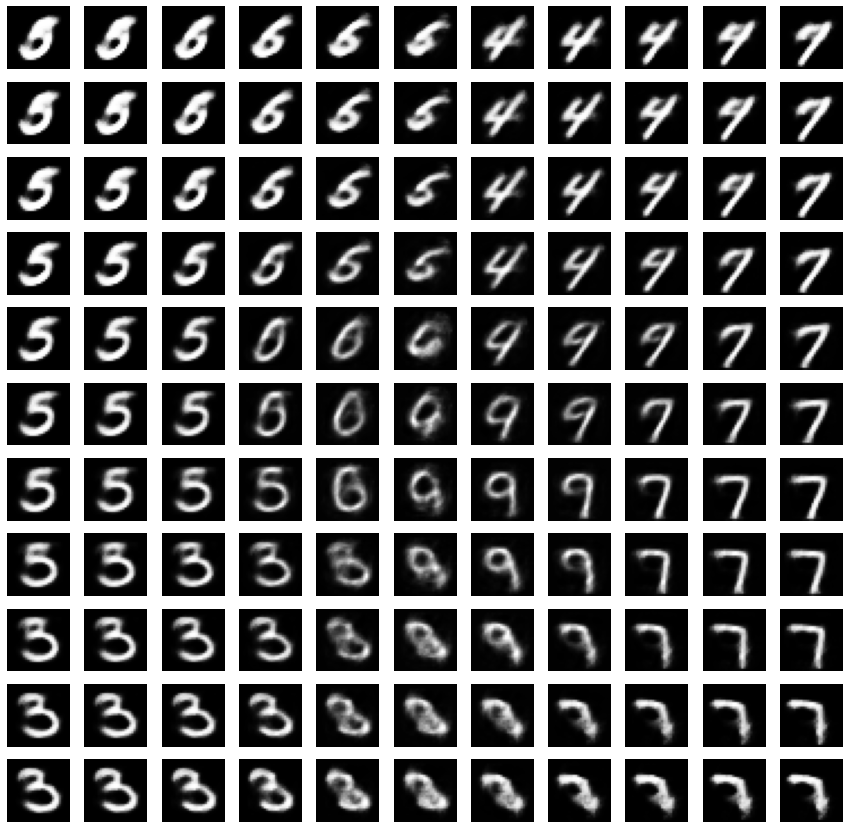

In [29]:
fig = plt.figure(figsize=(15, 15))
for i in range(Z.shape[0]):
    ax = fig.add_subplot(11, 11, i+1)
    ax.imshow(Z[i,:].view((28, 28)).detach().cpu().numpy(), cmap=plt.cm.gray)
    ax.set_axis_off()